# Popularne instancje QAP wraz z dokładnym minimum funkcji celu Nug12 12 578 (OPT) (12,7,9,3,4,8,11,1,5,6,10,2) Nug14 14 1014 (OPT) (9,8,13,2,1,11,7,14,3,4,12,5,6,10) Nug15 15 1150 (OPT) (1,2,13,8,9,4,3,14,7,11,10,15,6,5,12) Nug16a 16 1610 (OPT) (9,14,2,15,16,3,10,12,8,11,6,5,7,1,4,13) Nug16b 16 1240 (OPT) (16,12,13,8,4,2,9,11,15,10,7,3,14,6,1,5) Nug17 17 1732 (OPT) (16,15,2,14,9,11,8,12,10,3,4,1,7,6,13,17,5) Nug18 18 1930 (OPT) (10,3,14,2,18,6,7,12,15,4,5,1,11,8,17,13,9,16) Nug20 20 2570 (OPT) (18,14,10,3,9,4,2,12,11,16,19,15,20,8,13,17,5,7,1,6) Nug21 21 2438 (OPT) (4,21,3,9,13,2,5,14,18,11,16,10,6,15,20,19,8,7,1,12,17) Nug22 22 3596 (OPT) (2,21,9,10,7,3,1,19,8,20,17,5,13,6,12,16,11,22,18,14,15) Nug24 24 3488 (OPT) (17,8,11,23,4,20,15,19,22,18,3,14,1,10,7,9,16,21,24,12,6,13,5,2) Nug25 25 3744 (OPT) (5,11,20,15,22,2,25,8,9,1,18,16,3,6,19,24,21,14,7,10,17,12,4,23,13) * Nug27 27 5234 (OPT) (23,18,3,1,27,17,5,12,7,15,4,26,8,19,20,2,24,21,14,10,9,13,22,25,6,16,11) * Nug28 28 5166 (OPT) (18,21,9,1,28,20,11,3,13,12,10,19,14,22,15,2,25,16,4,23,7,17,24,26,5,27,8,6) * Nug30 30 6124 (OPT) (5 12 6 13 2 21 26 24 10 9 29 28 17 1 8 7 19 25 23 22 11 16 30 4 15 18 27 3 14 20)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request

%matplotlib inline

In [47]:
QAP_INSTANCE_FILE_NAME = 'nug12.dat'

# Reading input data

In [48]:
with open(f'QAPdata/{QAP_INSTANCE_FILE_NAME}') as qap_instance_file:
   line = qap_instance_file.readline()
   n = int(line[:-1].split()[0])
   print('Problem size: %d' % n)

   A = np.empty((n, n))
   qap_instance_file.readline()
   for i in range(n):
       line = qap_instance_file.readline()
       A[i, :] = list(map(int, line[:-1].split()))
   print('Flow matrix:\n', A)

   B = np.empty((n, n))
   qap_instance_file.readline()
   for i in range(n):
       line = qap_instance_file.readline()
       B[i, :] = list(map(int, line[:-1].split()))
   print('Distance matrix:\n', B)


Problem size: 12
Flow matrix:
 [[0. 1. 2. 3. 1. 2. 3. 4. 2. 3. 4. 5.]
 [1. 0. 1. 2. 2. 1. 2. 3. 3. 2. 3. 4.]
 [2. 1. 0. 1. 3. 2. 1. 2. 4. 3. 2. 3.]
 [3. 2. 1. 0. 4. 3. 2. 1. 5. 4. 3. 2.]
 [1. 2. 3. 4. 0. 1. 2. 3. 1. 2. 3. 4.]
 [2. 1. 2. 3. 1. 0. 1. 2. 2. 1. 2. 3.]
 [3. 2. 1. 2. 2. 1. 0. 1. 3. 2. 1. 2.]
 [4. 3. 2. 1. 3. 2. 1. 0. 4. 3. 2. 1.]
 [2. 3. 4. 5. 1. 2. 3. 4. 0. 1. 2. 3.]
 [3. 2. 3. 4. 2. 1. 2. 3. 1. 0. 1. 2.]
 [4. 3. 2. 3. 3. 2. 1. 2. 2. 1. 0. 1.]
 [5. 4. 3. 2. 4. 3. 2. 1. 3. 2. 1. 0.]]
Distance matrix:
 [[ 0.  5.  2.  4.  1.  0.  0.  6.  2.  1.  1.  1.]
 [ 5.  0.  3.  0.  2.  2.  2.  0.  4.  5.  0.  0.]
 [ 2.  3.  0.  0.  0.  0.  0.  5.  5.  2.  2.  2.]
 [ 4.  0.  0.  0.  5.  2.  2. 10.  0.  0.  5.  5.]
 [ 1.  2.  0.  5.  0. 10.  0.  0.  0.  5.  1.  1.]
 [ 0.  2.  0.  2. 10.  0.  5.  1.  1.  5.  4.  0.]
 [ 0.  2.  0.  2.  0.  5.  0. 10.  5.  2.  3.  3.]
 [ 6.  0.  5. 10.  0.  1. 10.  0.  0.  0.  5.  0.]
 [ 2.  4.  5.  0.  0.  1.  5.  0.  0.  0. 10. 10.]
 [ 1.  5.  2.  0.  5.  

# Objective function

In [49]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

In [50]:
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
print(qap_objective_function(p), p)


578.0 [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]


# Random Sampling

In [51]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = qap_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(qap_objective_function(p), p)


63.95090174674988
600.0 [ 2  0  1  9  8  7  6  5 11 10  3  4]


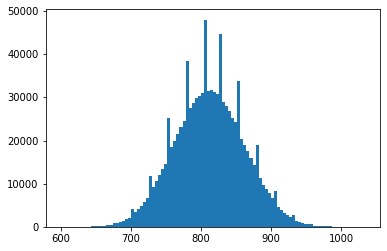

812.04238 49.75125634529845


In [52]:
plt.figure()
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())


# Simulated Annealing

In [2]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(p.size, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q


In [74]:
class SA:
    def get_objective_function(self, instance_name):
        with open(f'QAPdata/{instance_name}') as qap_instance_file:
           line = qap_instance_file.readline()
           n = int(line[:-1].split()[0])
           self.n = n
           A = np.empty((n, n))
           qap_instance_file.readline()
           for i in range(n):
               line = qap_instance_file.readline()
               A[i, :] = list(map(int, line[:-1].split()))
           B = np.empty((n, n))
           qap_instance_file.readline()
           for i in range(n):
               line = qap_instance_file.readline()
               B[i, :] = list(map(int, line[:-1].split()))
        def qap_objective_function(p):
            s = 0.0
            for i in range(n):
                s += (A[i, :] * B[p[i], p]).sum()
            return s
        return qap_objective_function
           
    def __init__(self, qap_instance="nug12.dat", T=500000, radius=1, alpha=1.0):
        self.T = T
        self.radius = radius
        self.alpha = alpha
        self.qap_instance = qap_instance
        self.objective_function = self.get_objective_function(qap_instance)
        self.costs = np.zeros(self.T)

    def run(self):
        t0 = time.time()

        p = np.random.permutation(self.n)
        p_cost = self.objective_function(p)
        self.costs = np.zeros(self.T)
        for t in range(self.T):
            q = random_neighbor(p, self.radius)
            q_cost = self.objective_function(q)
            if(q_cost < p_cost):
                p, p_cost = q, q_cost
            elif(np.random.rand() < np.exp(- self.alpha * (q_cost - p_cost) * t/self.T)):
                p, p_cost = q, q_cost
            self.costs[t] = p_cost

        print(time.time() - t0, self.costs.min())
    
    def plot(self):
        plt.figure()
        plt.plot(self.costs)
        plt.show()

    def hist(self):
        plt.figure()
        plt.hist(self.costs, bins=100)
        plt.show()


40.77605223655701 578.0


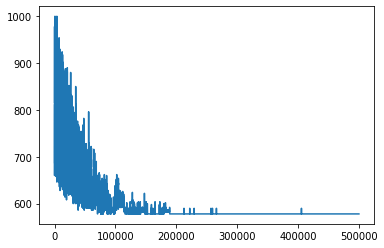

In [69]:
t1 = SA("nug12.dat")
t1.run()
t1.plot()


47.8749566078186 1036.0


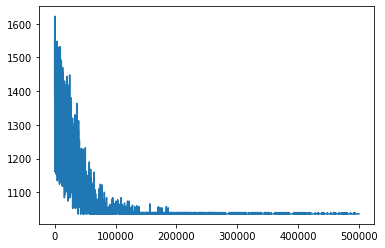

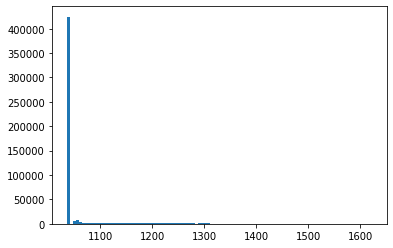

In [75]:
t14 = SA("nug14.dat")
t14.run() 
t14.plot()
t14.hist()

In [80]:
best_parameters = []
for r in range(1, 11):
   for alpha in np.arange(0.1, 2.0, 0.1):
      t = SA("nug14.dat", T=100000, radius=r, alpha=alpha)
      t.run()
      best_parameters.append((r, alpha, t.costs.min()))
 
best_parameters.sort(key= lambda x: x[2])
print(best_parameters[:10])

9.221273183822632 1038.0
9.248680830001831 1046.0
9.353529930114746 1068.0
9.003610610961914 1040.0
9.485279560089111 1046.0
9.42493748664856 1056.0
9.37440013885498 1068.0
9.15229058265686 1068.0
9.5401611328125 1068.0
9.297677516937256 1074.0
9.372292518615723 1050.0
9.360657453536987 1080.0
9.293379545211792 1070.0
9.240007877349854 1060.0
9.342756032943726 1054.0
9.214213609695435 1052.0
9.310941696166992 1064.0
9.370575904846191 1084.0
9.462389707565308 1036.0
10.931941509246826 1092.0
10.949210166931152 1054.0
11.04177451133728 1072.0
10.851111888885498 1064.0
10.891939878463745 1088.0
10.946131229400635 1046.0
10.955950498580933 1068.0
10.867321968078613 1046.0
10.951809406280518 1074.0
11.109476327896118 1032.0
11.025690793991089 1054.0
11.033686399459839 1066.0
11.096608877182007 1068.0
11.09247875213623 1072.0
11.124107360839844 1074.0
11.081633806228638 1060.0
11.145690202713013 1052.0
11.07358169555664 1038.0
10.996754169464111 1060.0
12.616718769073486 1070.0
12.7084379196

22.30128765106201 1076.0
26.747854232788086 1062.0
31.0719895362854 1036.0
20.08287000656128 1058.0
27.511446237564087 1076.0
19.961242198944092 1050.0


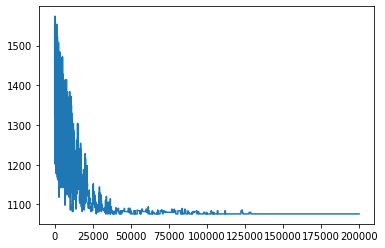

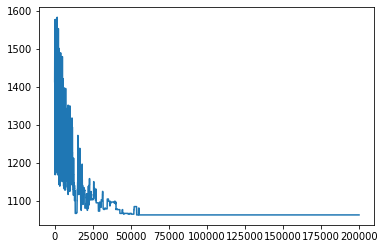

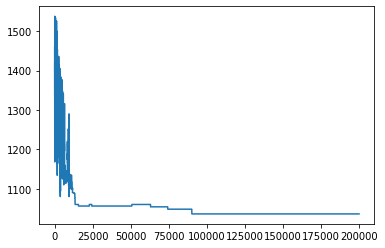

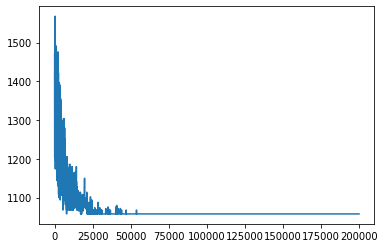

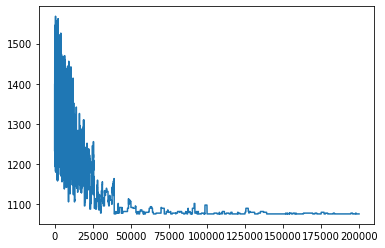

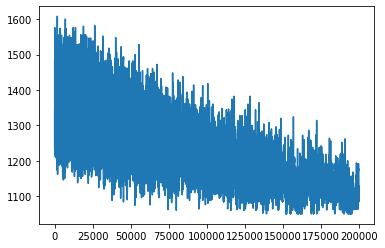

In [85]:
test1 = SA("nug14.dat", T=200000, radius=2,alpha=1.0)
test2 = SA("nug14.dat", T=200000, radius=3, alpha=1.1)
test3 = SA("nug14.dat", T=200000, radius=4, alpha=1.8)
test4 = SA("nug14.dat", T=200000, radius=1, alpha=1.9)
test5 = SA("nug14.dat", T=200000, radius=3, alpha=0.8)
test6 = SA("nug14.dat", T=200000, radius=1, alpha=0.1)
test1.run()
test2.run()
test3.run()
test4.run()
test5.run()
test6.run()

test1.plot()
test2.plot()
test3.plot()
test4.plot()
test5.plot()
test6.plot()


In [3]:
from scipy.stats import kendalltau

class SA2:
    def get_objective_function(self, instance_name):
        with open(f'QAPdata/{instance_name}') as qap_instance_file:
           line = qap_instance_file.readline()
           n = int(line[:-1].split()[0])
           self.n = n
           A = np.empty((n, n))
           qap_instance_file.readline()
           for i in range(n):
               line = qap_instance_file.readline()
               A[i, :] = list(map(int, line[:-1].split()))
           B = np.empty((n, n))
           qap_instance_file.readline()
           for i in range(n):
               line = qap_instance_file.readline()
               B[i, :] = list(map(int, line[:-1].split()))

        def qap_objective_function(p):
            s = 0.0
            for i in range(n):
                s += (A[i, :] * B[p[i], p]).sum()
            return s
        return qap_objective_function

    def __init__(self, qap_instance="nug12.dat", T=500000, radius=1, alpha=1.0):
        self.T = T
        self.radius = radius
        self.alpha = alpha
        self.qap_instance = qap_instance
        self.objective_function = self.get_objective_function(qap_instance)
        self.costs = np.zeros(self.T)
        self.successes = np.zeros(self.T)
        self.defeats = np.zeros(self.T)
        self.permutation_diff = np.zeros(self.T)
        self.score_diff = np.zeros(self.T)

    def run(self):
        t0 = time.time()

        p = np.random.permutation(self.n)
        p_cost = self.objective_function(p)
        self.costs = np.zeros(self.T)
        for t in range(self.T):
            q = random_neighbor(p, self.radius)
            q_cost = self.objective_function(q)
            if(q_cost < p_cost):
                self.successes[t] += 1
                self.permutation_diff[t] = kendalltau(p, q)[0]
                self.score_diff[t] = p_cost - q_cost
                p, p_cost = q, q_cost
            elif(np.random.rand() < np.exp(- self.alpha * (q_cost - p_cost) * t/self.T)):
                self.defeats[t] += 1
                p, p_cost = q, q_cost
            self.costs[t] = p_cost

        print(time.time() - t0, self.costs.min())

    def plot(self):
        plt.figure()
        plt.plot(self.costs)
        plt.show()

    def hist(self):
        plt.figure()
        plt.hist(self.costs, bins=100)
        plt.show()

    def plot_successes(self):
      x = np.array(self.successes).reshape(-1, 50)
      x = x.sum(axis=1)
      plt.figure()
      plt.plot(x)
      plt.show()
   
    def plot_defeats(self):
      x = np.array(self.defeats).reshape(-1, 50)
      x = x.sum(axis=1)
      plt.figure()
      plt.plot(x)
      plt.show()

    def plot_permutation_diff(self):
        perm = self.permutation_diff[self.permutation_diff != 0]
        perm = perm[::30]
        cost = self.score_diff[self.score_diff != 0]
        cost = cost[::30]
        plt.figure()
        plt.scatter(np.arange(perm.size), perm, s=1)
        plt.show()
        plt.figure()
        plt.scatter(np.arange(cost.size), cost, s=1)
        plt.show()


31.27829360961914 1048.0


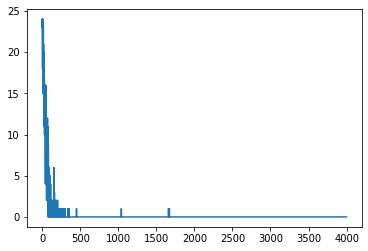

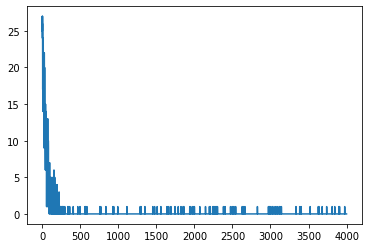

In [147]:
test3 = SA2("nug14.dat", T=200000, radius=4, alpha=1.8)
test3.run()
test3.plot_successes()
test3.plot_defeats()

18.071717500686646 578.0


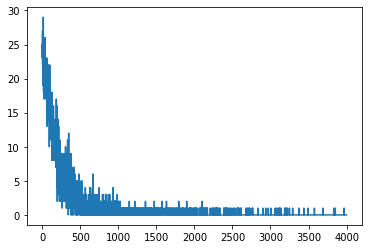

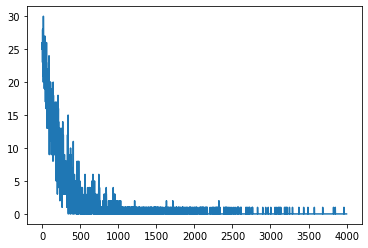

In [140]:
test3 = SA2("nug12.dat", T=200000, radius=1, alpha=1.0)
test3.run()
test3.plot_successes()
test3.plot_defeats()


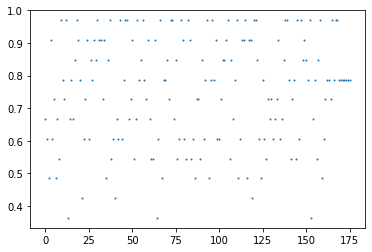

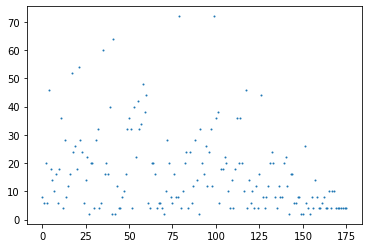

[0.66666667 0.90909091 0.84848485 ... 0.78787879 0.78787879 0.78787879]


In [141]:
test3.plot_permutation_diff()
print(test3.permutation_diff[test3.permutation_diff != 0])

In [145]:
def check_further(lvl, p, r, function):
    if lvl == 0:
        return function(p)
    p = random_neighbor(p, r)

    return min(check_further(lvl-1, p, r, function), function(p))


class SA3:
    def get_objective_function(self, instance_name):
        with open(f'QAPdata/{instance_name}') as qap_instance_file:
           line = qap_instance_file.readline()
           n = int(line[:-1].split()[0])
           self.n = n
           A = np.empty((n, n))
           qap_instance_file.readline()
           for i in range(n):
               line = qap_instance_file.readline()
               A[i, :] = list(map(int, line[:-1].split()))
           B = np.empty((n, n))
           qap_instance_file.readline()
           for i in range(n):
               line = qap_instance_file.readline()
               B[i, :] = list(map(int, line[:-1].split()))

        def qap_objective_function(p):
            s = 0.0
            for i in range(n):
                s += (A[i, :] * B[p[i], p]).sum()
            return s
        return qap_objective_function

    def __init__(self, qap_instance="nug12.dat", T=500000, radius=1, alpha=1.0):
        self.T = T
        self.radius = radius
        self.alpha = alpha
        self.qap_instance = qap_instance
        self.objective_function = self.get_objective_function(qap_instance)
        self.costs = np.zeros(self.T)
        self.successes = np.zeros(self.T)
        self.defeats = np.zeros(self.T)
        self.permutation_diff = np.zeros(self.T)
        self.score_diff = np.zeros(self.T)

    def run(self):
        t0 = time.time()

        p = np.random.permutation(self.n)
        p_cost = self.objective_function(p)
        self.costs = np.zeros(self.T)
        for t in range(self.T):
            q = random_neighbor(p, self.radius)
            q_cost = self.objective_function(q)
            if(q_cost < p_cost):
                self.successes[t] += 1
                self.permutation_diff[t] = kendalltau(p, q)[0]
                self.score_diff[t] = p_cost - q_cost
                p, p_cost = q, q_cost
            elif(np.random.rand() < np.exp(- self.alpha * (q_cost - p_cost) * t/self.T) or (check_further(3, p.copy(), self.radius, self.objective_function) < p_cost)):
                self.defeats[t] += 1
                p, p_cost = q, q_cost
            self.costs[t] = p_cost

        print(time.time() - t0, self.costs.min())

    def plot(self):
        plt.figure()
        plt.plot(self.costs)
        plt.show()


In [146]:
test3 = SA3("nug14.dat", T=200000, radius=4, alpha=1.8)
test3.run()


119.37916254997253 1042.0


In [5]:
class SA4:
    def get_objective_function(self, instance_name):
        with open(f'QAPdata/{instance_name}') as qap_instance_file:
           line = qap_instance_file.readline()
           n = int(line[:-1].split()[0])
           self.n = n
           A = np.empty((n, n))
           qap_instance_file.readline()
           for i in range(n):
               line = qap_instance_file.readline()
               A[i, :] = list(map(int, line[:-1].split()))
           B = np.empty((n, n))
           qap_instance_file.readline()
           for i in range(n):
               line = qap_instance_file.readline()
               B[i, :] = list(map(int, line[:-1].split()))

        def qap_objective_function(p):
            s = 0.0
            for i in range(n):
                s += (A[i, :] * B[p[i], p]).sum()
            return s
        return qap_objective_function

    def __init__(self, qap_instance="nug12.dat", T=500000, radius=1, alpha=1.0):
        self.T = T
        self.radius = radius
        self.alpha = alpha
        self.qap_instance = qap_instance
        self.objective_function = self.get_objective_function(qap_instance)
        self.costs = np.zeros(self.T)
        self.successes = np.zeros(self.T)
        self.defeats = np.zeros(self.T)
        self.permutation_diff = np.zeros(self.T)
        self.score_diff = np.zeros(self.T)

    def run(self):
        t0 = time.time()

        p = np.random.permutation(self.n)
        p_cost = self.objective_function(p)
        self.costs = np.zeros(self.T)
        for t in range(self.T):
            q = random_neighbor(p, self.radius)
            q_cost = self.objective_function(q)
            if(q_cost < p_cost):
                self.successes[t] += 1
                self.permutation_diff[t] = kendalltau(p, q)[0]
                self.score_diff[t] = p_cost - q_cost
                p, p_cost = q, q_cost
            elif(np.random.rand() < np.exp(- self.alpha * np.sqrt(q_cost - p_cost) * t/self.T)):
                self.defeats[t] += 1
                p, p_cost = q, q_cost
            self.costs[t] = p_cost

        print(time.time() - t0, self.costs.min())

    def plot(self):
        plt.figure()
        plt.plot(self.costs)
        plt.show()


In [10]:
test4= SA4("nug14.dat", T=200000, radius=4, alpha=1.8)
test4.run()


34.33372187614441 1020.0


In [12]:
test15 = SA4("nug15.dat", T=200000, radius=4, alpha=1.8)
test15.run()

31.41078233718872 1160.0


In [13]:
test17 = SA4("nug17.dat", T=200000, radius=4, alpha=1.8)
test17.run()


33.2484827041626 1742.0


In [6]:
data_for_histogram = []
dict_for_histogram = {}

for i in range(200):
   test = SA4("nug14.dat", T=200000, radius=4, alpha=1.8)
   test.run()
   data_for_histogram.append(test.costs.min())
   dict_for_histogram[test.costs.min()] = dict_for_histogram.get(test.costs.min(), 0) + 1

print(dict_for_histogram)

33.197612047195435 1036.0
36.84722447395325 1046.0
34.895103454589844 1042.0
31.53566551208496 1014.0
30.617138385772705 1014.0
31.102439880371094 1030.0
30.640234231948853 1024.0
30.736182928085327 1032.0
31.184929847717285 1054.0
30.575271606445312 1052.0
30.652831077575684 1024.0
31.02590274810791 1036.0
30.88119649887085 1036.0
31.42181921005249 1046.0
31.086158990859985 1024.0
30.811798095703125 1034.0
30.811579942703247 1034.0
30.811418294906616 1054.0
30.81322693824768 1038.0
31.93828272819519 1024.0
33.943334341049194 1034.0
33.389031410217285 1038.0
41.78539299964905 1048.0
34.03301215171814 1030.0
32.13918495178223 1022.0
30.995576858520508 1018.0
31.52324342727661 1024.0
32.969780921936035 1026.0
32.89744997024536 1028.0
31.362209796905518 1020.0
31.234071016311646 1028.0
31.094934701919556 1048.0
30.68323016166687 1046.0
31.07621955871582 1042.0
31.031389713287354 1054.0
30.63687539100647 1020.0
40.18795442581177 1020.0
37.839876890182495 1032.0
34.41788387298584 1038.0
30.

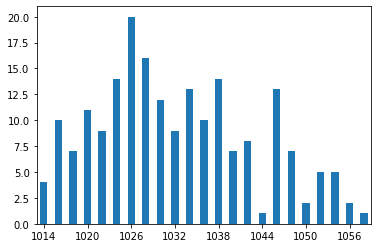

In [32]:
data_for_histogram = np.array(data_for_histogram)
smallest = data_for_histogram.min()
biggest = data_for_histogram.max()
x = np.arange(smallest, biggest + 1)
data = [dict_for_histogram.get(i, 0) for i in x]

plt.bar(x, data, 1)
plt.xticks(x[x % 6 == 0])
plt.xlim(x.min()-1, x.max()+1)
plt.show()